# Regresión Lineal Simple con statsmodel

In [216]:
import pandas as pd
import numpy as np

In [217]:
data = pd.read_csv("../datasets/ads/Advertising.csv")

In [218]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [219]:
import statsmodels.formula.api as smf

In [220]:
lm = smf.ols(formula='Sales~TV', data=data).fit()

*fit()* para calcular la recta que mejor se ajusta.

In [221]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

El modelo lineal predictivo sería ** Sales = 7.032594 + 0.047537 * TV **, asumiendo que existe una relación lineal

In [222]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

Se pueden apreciar valores muy pequeños, con lo cual, las predicciones que podemos realizar con este modelo resultarían bastante acertadas

In [223]:
lm.rsquared # R^2

0.611875050850071

In [224]:
lm.rsquared_adj # R^2 ajustado

0.6099148238341623

In [225]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 23 Feb 2020   Prob (F-statistic):           1.47e-42
Time:                        17:58:38   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

AIC y BIC son indicadores que, cuanto más mayores mejor será la predicción

In [226]:
sales_pred = lm.predict(pd.DataFrame(data["TV"]))

In [227]:
import matplotlib.pyplot as plt

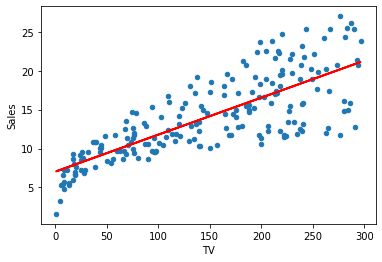

In [228]:
%matplotlib inline
data.plot(kind = "scatter", x = "TV", y ="Sales")
plt.plot(pd.DataFrame(data["TV"]), sales_pred, c="red", linewidth = 2)

In [229]:
data["sales_pred"] = 7.032594 + 0.047537*data["TV"]

In [230]:
data["RSE"] = (data["Sales"]-data["sales_pred"])**2

In [231]:
SSD = sum(data["RSE"])
SSD

2102.5305838896525

In [232]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

3.258656369238098

In [233]:
RSE/np.mean(data["Sales"])

0.23238768901680143

Se aprecia un porcentaje de error del 23 % aprox., es decir, el 23 del modelo no queda explicado

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.3860819 , -6.82624404, -5.26640618, -3.70656832, -2.14673046,
        -0.5868926 ,  0.97294526,  2.53278312,  4.09262098,  5.65245884,
         7.2122967 ]),
 <a list of 10 Patch objects>)

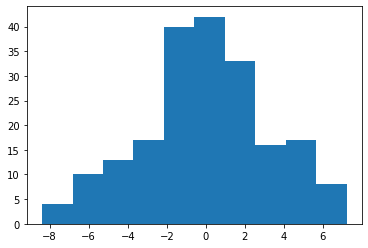

In [234]:
plt.hist((data["Sales"]-data["sales_pred"]))

El modelo es bastante bueno según el p-valor anterior, pero aún así, hay un 23% que no se puede explicar, también venía indicado porque el R^2 tampoco era muy alto (0.62). Este gran porcentaje de error se podría reducir si en el modelo incluimos más información, es decir, efectuamos una regresión lineal múltiple

# Regresión lineal múltiple en Python
## El paquete statsmodel para regresión múltiple
* Sales ~TV
* Sales ~Newspaper
* Sales ~Radio
* Sales ~TV+Newspaper
* Sales ~TV+Radio
* Sales ~Newspaper+Radio
* Sales ~TV+Newspaper+Radio

### Modelo con TV y Newspaper

In [235]:
lm2 = smf.ols(formula="Sales~TV+Newspaper", data = data).fit()

In [236]:
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [237]:
lm2.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

Se aprecian valores lo sufientemente bajos

**Sales = 5.774948 + 0.046901 x TV + 0.044219 x Newspaper**

In [238]:
lm2.rsquared, lm2.rsquared_adj

(0.6458354938293271, 0.6422399150864777)

Los valores de R^2 han mejorado respecto al modelo anterior

In [239]:
sales_pred = lm2.predict(data[["TV", "Newspaper"]])

In [240]:
SSD = sum((data["Sales"]-sales_pred)**2)
RSE = np.sqrt(SSD/(len(data)-2-1)) # variables predictoras - 1
RSE

3.120719860252885

Se aprecia una bajada en el error estándar residual respecto al modelo anterior

In [241]:
RSE / np.mean(data["Sales"])

0.2225508903728212

Se puede concluir que añadir la variable Newspaper al modelo no ha aportado mejoras significativas a la predicción

### Modelo con TV y Radio

La radio tenia la mejor correlación con las ventas después de la TV, con lo cual, debería aportar más al modelo que la publicidad de tipo Newspaper

In [242]:
lm3 = smf.ols(formula="Sales~TV+Radio", data = data).fit()

In [243]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 23 Feb 2020   Prob (F-statistic):           4.83e-98
Time:                        17:58:41   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Se aprecia un estadístico mucho más bajo (4.83e-98). Buena señal de que el modelo seguramente sea mejor. El R^2 también se acerca mucho a 1

In [244]:
sales_pred = lm3.predict(data[["TV", "Radio"]])
SSD = sum((data["Sales"]-sales_pred)**2)
RSE = np.sqrt(SSD/(len(data)-2-1))
RSE

1.6813609125080011

Ha bajado casi a la mitad a comparación con el modelo anterior

In [245]:
RSE / np.mean(data["Sales"])

0.11990450436855062

Ahora el modelo deja sin explicar el 12 %, mejora considerable. Con lo cual se puede concluir que realizar el modelo con estos dos tipos de publicidad predice mucho mejor las ventas

### Modelo con TV, Radio y Newspaper

In [246]:
lm4 = smf.ols(formula="Sales~TV+Radio+Newspaper", data = data).fit()

In [247]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 23 Feb 2020   Prob (F-statistic):           1.58e-96
Time:                        17:58:42   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

No se aprecian mejoras en el estadistico ni el R^2, respecto al modelo anterior. Además, en el intervalo de confianza de la nueva variable añadida entraría el 0 (mala señal) y el p-valor es muy cercano a 1 (Newspaper	-0.0010	0.006	-0.177	0.860	-0.013	0.011
)

In [248]:
sales_pred = lm4.predict(data[["TV", "Radio","Newspaper"]])
SSD = sum((data["Sales"]-sales_pred)**2)
RSE = np.sqrt(SSD/(len(data)-3-1))
RSE

1.6855103734147436

In [249]:
RSE / np.mean(data["Sales"])

0.12020041885646236

Este modelo no mejora el anterior, además añade una variable más, con lo cual, el aumento en la complejidad del modelo no merece la pena, porque no se mejora considerablemente

## Multicolinealidad

### Factor Inflación de la Varianza

In [250]:
from IPython.display import Image 

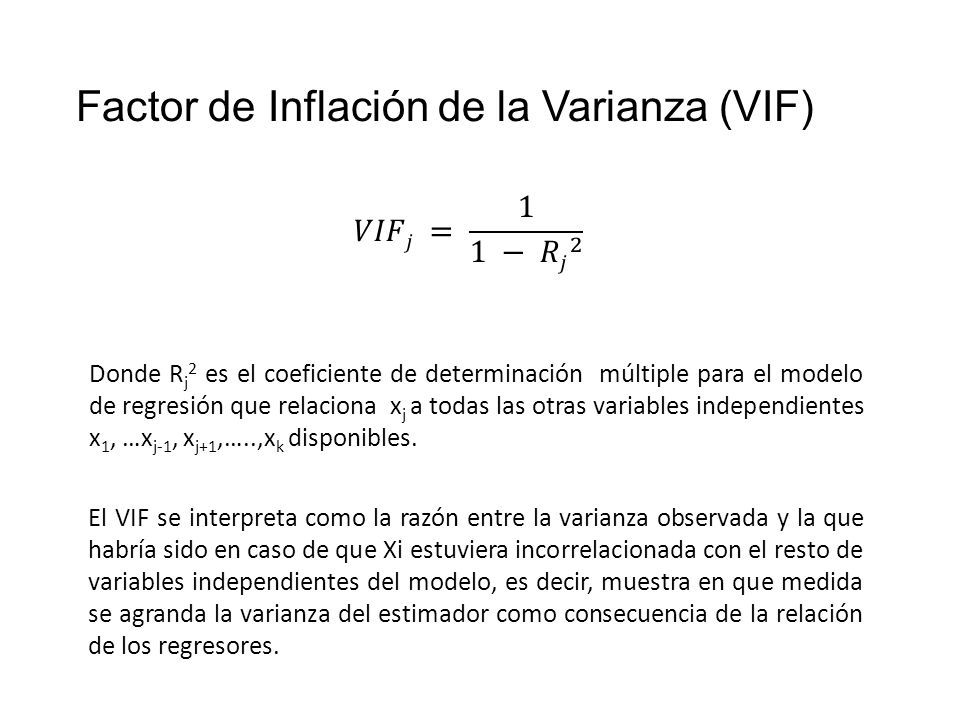

In [251]:
Image(filename='../Recursos/Regresion Lineal/inflacion_varianza.jpg')

* VIF = 1 : Las variables no están correlacionadas
* VIF < 5 : Las variables tienen una correlación moderada y se pueden quedar en el modelo
* VIF >5 : Las variables están altamente correlacionadas y deben desaparecer del modelo.

In [252]:
# Newspaper ~ TV + Radio -> R^2 VIF = 1/(1-R^2)
lm_n = smf.ols(formula="Newspaper~TV+Radio", data = data).fit()
VIF = 1/(1-lm_n.rsquared)
VIF

1.1451873787239288

In [253]:
# TV ~ Newspaper + Radio -> R^2 VIF = 1/(1-R^2)
lm_tv = smf.ols(formula="TV~Newspaper+Radio", data=data).fit()
VIF = 1/(1-lm_tv.rsquared)
VIF

1.00461078493965

In [254]:
# TV ~ Newspaper + Radio -> R^2 VIF = 1/(1-R^2)
lm_r = smf.ols(formula="Radio~Newspaper+TV", data=data).fit()
VIF = 1/(1-lm_r.rsquared)
VIF

1.1449519171055353

## Validación del modelo


### División del dataset en conjunto de entrenamiento y testing

In [255]:
a = np.random.randn(len(data))
check = (a<0.8)
training = data[check]
testing = data[~check]

In [256]:
lm5 = smf.ols(formula="Sales~TV+Radio", data=training).fit()

In [257]:
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     601.0
Date:                Sun, 23 Feb 2020   Prob (F-statistic):           2.63e-74
Time:                        17:58:42   Log-Likelihood:                -315.68
No. Observations:                 160   AIC:                             637.4
Df Residuals:                     157   BIC:                             646.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6849      0.366      7.341      0.000       1.963       3.407
TV             0.0464      0.002     29.009      0.000       0.043       0.050
Radio          0.1880      0.009     19.953      0.000       0.169       0.207
==============================================================================
Omnibus:                       44.659   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.809
Skew:                          -1.231   Prob(JB):                     1.57e-21
Kurtosis:                       5.883   Cond. No.                         464.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Validación del modelo con el conjunto de testing

In [258]:
sales_test_pred = lm.predict(testing)

In [259]:
SSD = sum((testing["Sales"]-sales_test_pred)**2)
SSD

383.0446220200681

In [260]:
RSE = np.sqrt(SSD/(len(testing)-2-1))
RSE

3.2175390210366888

In [261]:
sales_mean = np.mean(testing["Sales"])
error = RSE/sales_mean
error

0.24688578715033102